## Prechodový dej v RC obvode

-------


<img src="./img/rc.png" width='400'>

* Tesne po pripojení jednosmerného zdroja napätia (batérie) začne obvodom tiecť prúd $$i(0) = \frac{u_1}{R}.$$
* Vďaka prúdu (toku elektrónov) sa na kapacitore hromadí elektrický náboj $$q(t) = \int i(t)\,\mathrm{d}t.$$
* Náboj na doske kapacitoru je priamo úmerný napätiu na ňom: $$ u_C(t) = \frac{q(t)}{C}. $$
* Vďaka nárastu napätia na kapacitore dôjde k úbytku napätia na rezistore.


* Druhý [Kirchhoffov zákon](https://en.wikipedia.org/wiki/Kirchhoff%27s_circuit_laws) aplikovaný na náš obvod: $$u_R+u_C-u_1=0.$$ $$Ri+\frac{1}{C}\int i\,\mathrm{d}t - u_1=0$$
    * Integrálna rovnica $\to$ deriváciou podľa času získame diferenciálnu rovnicu 1. rádu: $$R\frac{\mathrm{d}i}{\mathrm{d}t} + \frac{1}{C}i = 0$$ s počiatočnou podmienkou $$i(0) = \frac{u_1}{R}.$$
    
#### Presné riešenie

In [20]:
from sympy import *

In [21]:
t, R, C, u_1 = symbols('t R C u_1') # Symbolické premenné

i = Function('i') # Funkcia premennej t
didt = i(t).diff(t) # Derivácia funkcie i podľa premennej t

eq = Eq(R * didt + i(t) / C, 0) # Naša diferenciálne rovnica

dsolve(eq, ics={i(0): u_1 / R}).simplify() # Riešenie ODE s počiatočnou podmienkou

Eq(i(t), u_1*exp(-t/(C*R))/R)

#### Numerické riešenie

* Diskretizácia času $\Rightarrow$ diferenciálna rovnica prejde na diferenčnú rovnicu premennej $$\Delta t=1/f_p$$
    * $f_p$ je vzorkovacia frekvencia
    * Derivácie nahradíme spätnými diferenciami $$R\frac{\mathrm{d}i}{\mathrm{d}t} + \frac{1}{C}i = 0~~~\longrightarrow ~~~ R\frac{i_n-i_{n-1}}{\Delta t} + \frac{1}{C}i_n=0$$
    
* Tým dostávame predpis pre vzorku s indexom $n$ pri znalosti vzroky s indexom $n-1$ (minulej vzorky) $$i_n = \frac{f_pRC}{f_pRC+1}i_{n-1}$$
    * Hodnota prvej vzorky je onou počiatočnou podmienkou: $i_0=\frac{u_1}{R}$.
    
#### Numerické riešenie $-$ Eulerova metóda

* Eulerova metóda pre riešenie obyčajných diferenciálnych rovníc 1. rádu:
    * Majme obyčajnú diferenciálnu rovnicu 1. rádu $$\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y(t))$$ s počiatočnou podmienkou $$y(t_0) = y_0.$$
    * Zvoľme si časový krok $h$.
    * Potom hodnoty neznámej funkcie $y$ sú rekurentne definované ako $$y_{n+1} = y_n + hf(t_n,y_n).$$
    
*  V našom prípade $$i_{n+1} = i_n + h\underbrace{(-\frac{1}{RC}i_n)}_{f(t_n, i_n)} = i_n (1 - \frac{h}{RC}).$$

#### Vykreslenie časového priebehu prúdu v obvode

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

In [3]:
u1 = 1
R = 100
C = 1e-3

# --- Analytické riešenie
t = np.linspace(0, 1, 300)
i_a = u1 / R * np.exp(-t / (C * R))

# --- Numerické riešenie + Vykreslenie interaktívneho grafu
def update(fp=7, h=.17):
    def predict_simple(old):
        return old * fp * R * C / (fp * R * C + 1)
    
    def predict_euler(old, h):
        return old * (1 - h / (R * C))
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlabel('$t~(\mathrm{s})$')
    ax.set_ylabel('$I~(\mathrm{mA})$')
    
    # --- Prostá diskretizácia
    t_simple = np.arange(0, 1 + 1 / fp, 1 / fp)
    i_simple = np.empty_like(t_simple)
    i_simple[0] = u1 / R # Počiatočná podmienka
    
    # --- Eulerova metóda
    t_euler = np.arange(0, 1, h)
    i_euler = np.empty_like(t_euler)
    i_euler[0] = u1 / R # Počiatočná podmienka

    for idx in range(1, len(i_simple)):
        i_simple[idx] = predict_simple(i_simple[idx - 1])
        
    for idx in range(1, len(i_euler)):
        i_euler[idx] = predict_euler(i_euler[idx - 1], h)
    
    ax.plot(t, i_a * 1000, label='Analytické riešenie')
    ax.plot(t_simple, i_simple * 1000, label='Numerické riešenie $-$ prostá diskretizácia')
    ax.plot(t_euler, i_euler * 1000, label='Numerické riešenie $-$ Eulerova metóda')
    
    ax.legend()
    
    fig.canvas.draw()
    
widgets.interact(update, fp=(2, 200, 5), h=(.01, .19, .01))

interactive(children=(IntSlider(value=7, description='fp', max=200, min=2, step=5), FloatSlider(value=0.17, de…

<function __main__.update(fp=7, h=0.17)>

## Cirkulácia neurotransmitteru v synapsii sluchového nervu

-----------

* V sluchovom orgáne sa mechanické vibrácie premieňajú na nervové vzruchy, prenášané do mozgu (elektrický signál)
* Pri stimulácii sluchového nervu monofrekvenčným tónom a meraní počtu vzruchov v sluchovom nerve získavame približne nasledujúci priebeh:

<img src="./img/pocet.png" width='400'>

* Počet vzruchov je úmerný počtu transmitterov v štrbine. Model vývoja počtu transmitterov v jednotlivých častiach reťazca možno modelovať pomocou Meddisovho modelu, popísaného sústavou troch diferenciálnych rovníc o troch neznámych $w$, $q$ a $c$:

<img src="./img/synapsia.png" width='400'>

$$\begin{align}\frac{\mathrm{d}q}{\mathrm{d}t} &= y(M-q)+xw-kq\\
\frac{\mathrm{d}c}{\mathrm{d}t} &= kq - (l+r)c\\
\frac{\mathrm{d}w}{\mathrm{d}t} &= rc-xw\end{align}$$

* V roku 2006 bol Meddisom jeho pôvodný model upravený tak, aby
    * Počet transmitterov mohol nadobúdať iba diskrétne hodnoty
    * Bola do procesu vnesená náhodnosť.
* O zabezpečenie týchto bodov sa stará funkcia $N$:
    * Vstup: 
        * Počet kvánt neurotransmitteru v danej časti reťazca
        * Pravdepodobnosť emisie jedného kvanta do inej časti reťazca
    * Výstup:
        * Logická hodnota, udávajúca, či bolo prenesené kvantum, alebo nebolo.
        
$$\begin{align}\frac{\mathrm{d}q}{\mathrm{d}t} &= N(M-q, y) + N(w, x) - N(q, k)\\
\frac{\mathrm{d}c}{\mathrm{d}t} &= N(q, k) - (l + r)c\\
\frac{\mathrm{d}w}{\mathrm{d}t} &= rc-N(w, x)\end{align}$$

In [24]:
def N(n, p):
    """
    Vráti logickú hodnotu, udávajúcu, či v danom časovom okamihu bolo (True) alebo nebolo (False) vyslané kvantum neurotransmitteru do štrbiny
    
    Args:
        n (int): Počet dostupných kvánt neurotransmitteru
        p (float): Pravdepodobnosť emisie pre každé jedno kvantum
    """
    p = 1 - (1 - p)**n # Pravdepodobnosť emisie kvanta
    
    return np.abs(p) > np.random.default_rng().uniform(0, 1)

In [49]:
fp = 4e4 # Vzorkovacia frekvencia
T = .1 # Dlžka tónu
f = 1e3 # Frekvencia tónu
A = 1 # Amplituda tónu

# --- Vytvorenie časového vektoru
t = np.linspace(0, T, int(T * fp), endpoint=False)

# --- Harmonický signál o frekvencii f
s = A * np.sin(2 * np.pi * f * t)

# --- Tvarovanie pomocou raised cosine rampy
T_ramp = 1e-2 # Dĺžka trvania rampy
t_ramp = np.arange(0, T_ramp, 1 / fp)
ramp_falling = (1 + np.cos(np.pi * (1 / T_ramp) * t_ramp)) / 2
ramp_rising = np.flip(ramp_falling)
window = np.hstack((ramp_rising, np.ones(len(s) - 2 * len(ramp_rising)), ramp_falling))

s *= window
s = np.hstack((np.zeros(256), s, np.zeros(4 * 256)))
s[s < 0] = 0 # Jednocestné usmernenie
s **= 3 # Umocnenie na tretiu

# --- Časová os predĺženého signálu
t_long = np.arange(0, len(s) / fp, 1 / fp)

<IPython.core.display.Javascript object>


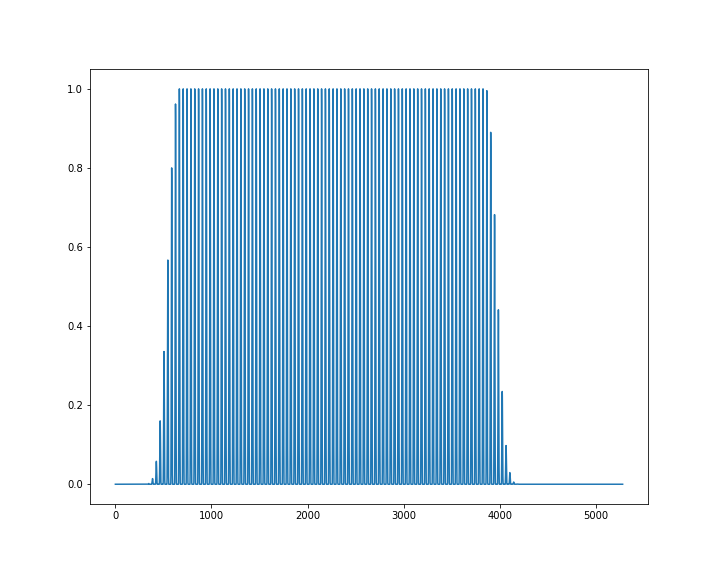

In [50]:
# --- Vykreslenie celého signálu
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(s)
plt.show()

In [29]:
def active_potentials(excitation, dt):
    """
    Args:
        excitation (numpy.ndarray): Model pravdepodobnosti vyslania kvanta do štrbiny (k) pri budení časovo obmedzeným harmonickým signálom (zodpovedá signálu s vytvorenému vyššie)
        dt (float): Časový krok (1 / fp)
    """
    M = 10
    y = 3
    l = 2580
    x = 30
    r = 6580
    k = 0

    q_old = M # Počet kvánt NT v štrbine na začiatku
    c_old = 0 # Počet kvánt NT v banke na začiatku
    w_old = 0 # Počet kvánt NT v obnovovacej jednotke na začiatku

    realization = np.zeros_like(excitation) # Inicializácia výsledného vektoru 
    
    # --- Numerické riešenie systému modelových rovníc pre prvý časový bod
    replenish = N(np.max(M - q_old, 0), y * dt)
    ejected = N(q_old, k)
    reprocessed = N(np.floor(w_old), x * dt)
    reuptake = r * c_old * dt
    lost = l * c_old * dt

    q = q_old + replenish - ejected + reprocessed
    c = c_old + ejected - reuptake - lost
    w = w_old + reuptake - reprocessed
    
    # --- Uloženie výsledku na prvú pozíciu výsledku
    realization[0] = ejected
    
    # --- Opakovanie riadkov 20 až 29 pre ďalšie body
    for i in range(1, len(excitation)):
        k = excitation[i] # Rýchlosť toku častíc do štrbiny
        
        q_old = np.round(q)
        c_old = c
        w_old = w
        
        replenish = N(np.max(M - q_old, 0), y * dt)
        ejected = N(q_old, k)
        reprocessed = N(np.floor(w_old), x * dt)
        reuptake = r * c_old * dt
        lost = l * c_old * dt
        
        q = q_old + replenish - ejected + reprocessed
        c = c_old + ejected - reuptake - lost
        w = w_old + reuptake - reprocessed
        
        realization[i] = ejected
    
    return realization

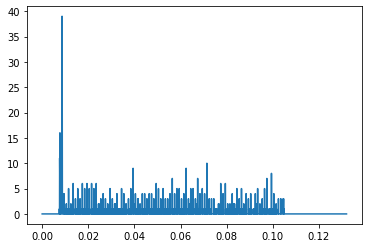

In [31]:
# --- Vyskúšanie modelu
%matplotlib inline

test = np.zeros_like(s)
for i in range(40):
    test += active_potentials(500 * s, 1 / fp)
    
fig, ax = plt.subplots()
ax.plot(t_long, test)
plt.show()